George Fotiou
COSC 411
Project 3

# Classification on the Breast Cancer dataset

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# load the dataset and create the dataframe

In [3]:
dataset = datasets.load_breast_cancer()
X = dataset['data']
y = dataset['target']
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# split the data saving 70% for training

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.3)

## Logistic Regression Analysis 

we will begin by trying different parameters, mainly focused on the different 'solvers'

In [8]:
lg = LogisticRegression(
                            tol=0.0001,
                            C=1.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='lbfgs',
                            max_iter=100
                        )

In [9]:
lg.fit(Xtrain,ytrain)
lg.score(Xtest, ytest)

0.9590643274853801

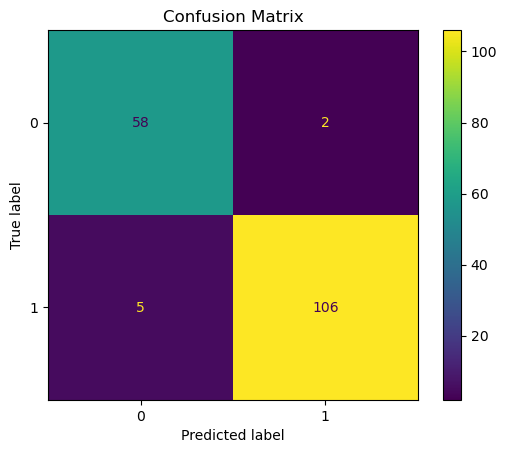

In [10]:
y_pred = lg.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [11]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.98      0.95      0.97       111

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [12]:
lg = LogisticRegression(
                            tol=0.0001,
                            C=1.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='sag',
                            max_iter=250
                        )

In [13]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.9532163742690059

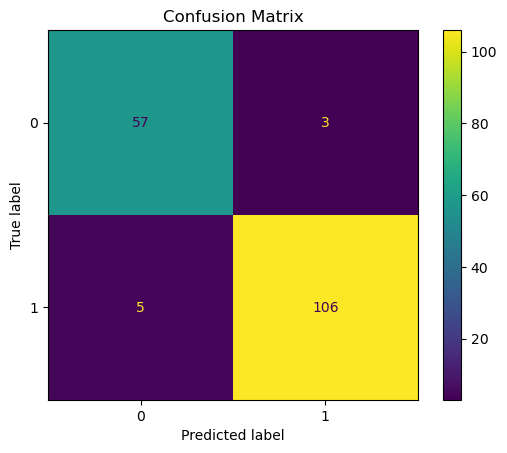

In [14]:
y_pred = lg.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [15]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.97      0.95      0.96       111

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [16]:
lg = LogisticRegression(
                            tol=0.0025,
                            C=2.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='newton-cg',
                            max_iter=350
                        )

In [17]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.9707602339181286

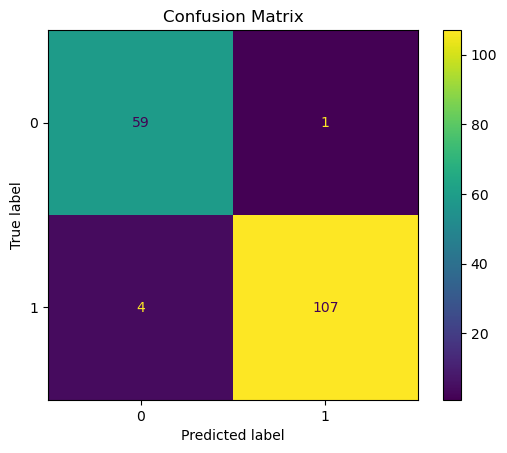

In [18]:
y_pred = lg.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [19]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.99      0.96      0.98       111

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [20]:
lg = LogisticRegression(
                            tol=0.0025,
                            C=2.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='newton-cholesky',
                            max_iter=100
                        )

In [21]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.9707602339181286

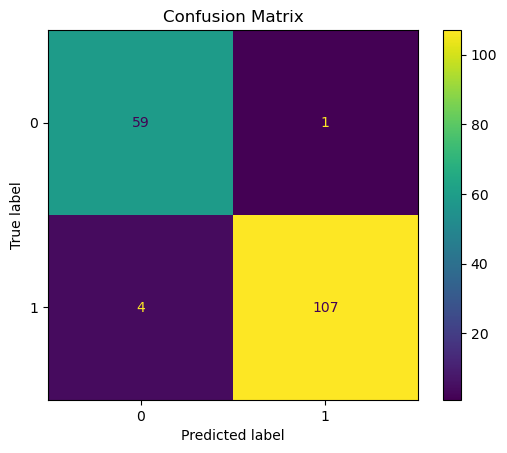

In [22]:
y_pred = lg.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [23]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        60
           1       0.99      0.96      0.98       111

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [24]:
lg = LogisticRegression(
                            tol=0.0001,
                            C=1.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='saga',
                            max_iter=200
                        )

In [25]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.9532163742690059

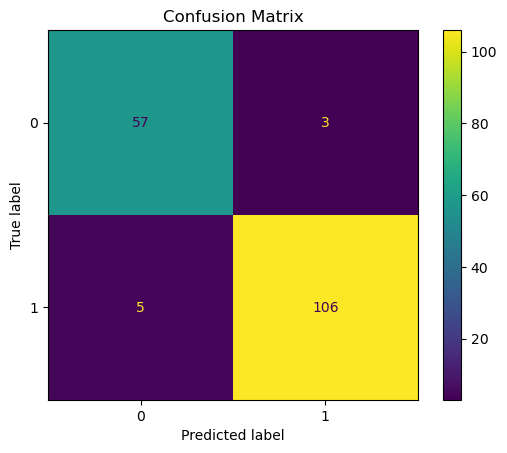

In [26]:
y_pred = lg.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [27]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        60
           1       0.97      0.95      0.96       111

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [28]:
lg = LogisticRegression(
                            tol=0.0001,
                            C=1.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='liblinear',
                            max_iter=200
                        )

In [29]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.9649122807017544

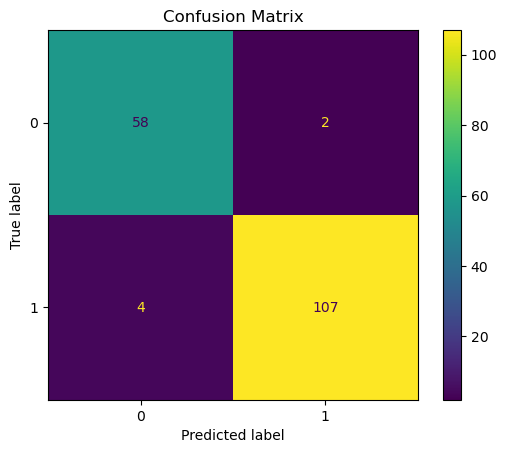

In [30]:
y_pred = lg.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [31]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        60
           1       0.98      0.96      0.97       111

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



## Artifical Nueral Network Anaylsis 

we will begin by trying different parameters, mainly focused on , 'solvers', 'learning_rate', 'learning_rate_init', and 'max_iter'

In [32]:
from sklearn.neural_network import MLPClassifier

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.3, random_state=42, stratify=y)

In [34]:
ann = MLPClassifier(hidden_layer_sizes=(1000,),
                   activation='relu', # default 
                   solver='adam', # default
                   alpha=0.001,
                   batch_size='auto',
                   learning_rate='constant',
                   learning_rate_init=0.001,
                   power_t=0.5,
                   max_iter=200,
                                 )

In [35]:
ann.fit(Xtrain, ytrain)
ann.score(Xtest, ytest)

0.9005847953216374

In [36]:
ann = MLPClassifier(hidden_layer_sizes=(1000,),
                   activation='relu',
                   solver='lbfgs',
                   alpha=0.005,
                   batch_size='auto',
                   learning_rate='constant',
                   learning_rate_init=0.5,
                   power_t=0.5,
                   max_iter=500,
                   shuffle=False,
                   random_state=42,
                  )

In [37]:
ann.fit(Xtrain, ytrain)
ann.score(Xtest, ytest)

0.9649122807017544

In [38]:
ann = MLPClassifier(hidden_layer_sizes=(1000,),
                   activation='relu',
                   solver='sgd',
                   alpha=0.0001,
                   batch_size='auto',
                   learning_rate='invscaling',
                   learning_rate_init=0.0001,
                   power_t=0.5,
                   max_iter=900,
                   shuffle=True,
                   random_state=None,
                   tol=0.0001,
                   verbose=False,
                   warm_start=False,
                   momentum=0.9,
                   nesterovs_momentum=True,
                   early_stopping=False,
                   validation_fraction=0.1,
                   beta_1=0.9,
                   beta_2=0.999,
                   epsilon=1e-08,
                   n_iter_no_change=10,
                   max_fun=15000 
                  )

In [39]:
ann.fit(Xtrain, ytrain)
ann.score(Xtest, ytest)

0.3742690058479532

We will use the 'lbfgs' solver with the following parameters. This combonation provided the most accuract results 

In [40]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=.3, random_state=42, stratify=y)

ann = MLPClassifier(hidden_layer_sizes=(1000,),
                   activation='relu',
                   solver='lbfgs',
                   alpha=0.005,
                   batch_size='auto',
                   learning_rate='constant',
                   learning_rate_init=0.5,
                   power_t=0.5,
                   max_iter=500,
                   shuffle=False,
                   random_state=42,
                  )

In [41]:
ann.fit(Xtrain, ytrain)
y_pred = ann.predict(Xtest)

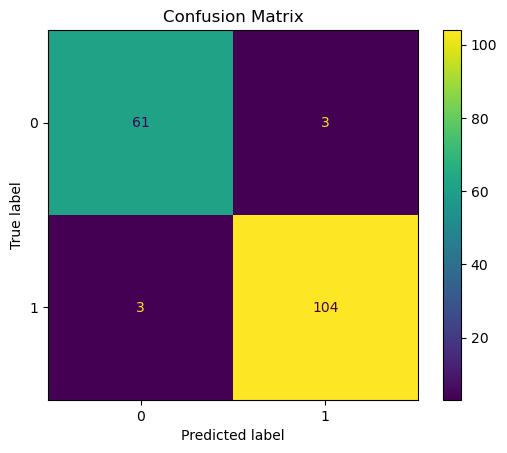

In [42]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [43]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        64
           1       0.97      0.97      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



# Classification on the attached dataset

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [45]:
data = pd.read_csv(r"C:\Users\George\Programming\Project_3\dataset.csv")
df = pd.DataFrame(data)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# print(df)

In [100]:
print(df.shape) # 196 rows, by 66 columbs, last column is the class identifiers

(196, 66)


In [101]:
print(X.shape) # 0-65 is data 

(196, 65)


In [102]:
print(y.shape) # one column of class identifiers

(196,)


In [103]:
normalizer = StandardScaler()

In [104]:
normX = normalizer.fit_transform(X) # we will just normalize the X values since it contains all the data

In [105]:
print(normX) # data is now normalized

[[ 0.05210115 -0.13302457  0.14706931 ... -0.21269046 -0.12426579
  -0.10671695]
 [-0.28048533 -0.56695233 -0.38063019 ... -0.32593581 -0.30316278
  -0.11330096]
 [-0.1020243   0.40959778  0.27899419 ...  1.00763117  0.75780872
   0.94306015]
 ...
 [-1.44757996  1.94014668 -1.43602919 ... -1.68490203 -1.56053085
  -1.45771835]
 [-1.30562232 -1.13367912 -1.23814188 ... -1.45153634 -1.3509488
  -1.32070737]
 [-1.53681048 -2.34591029 -1.50199163 ... -1.69609366 -1.54410283
  -1.39928968]]


## Logisitic Regression Analysis 

we will focus on the different 'solvers' as well as changing other parameters as need

In [110]:
Xtrain, Xtest, ytrain, ytest = train_test_split(normX,y, test_size=.2, random_state=42, stratify=y)

In [111]:
lg = LogisticRegression(
                            tol=0.0025,
                            C=2.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='saga',
                            max_iter=600
                        )

In [112]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.75

In [113]:
y_pred = lg.predict(Xtest)

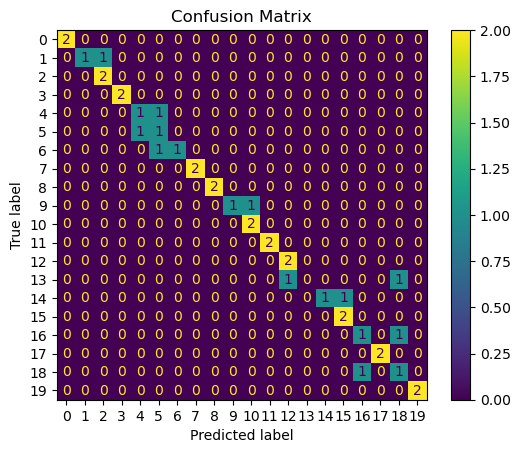

In [56]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [57]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       0.33      0.50      0.40         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         2
          16       0.67      1.00      0.80         2
          17       0.50      0.50      0.50         2
          18       1.00    

In [58]:
lg = LogisticRegression(
                            tol=0.0065,
                            C=4.0,
                            intercept_scaling=1,
                            class_weight=None,
                            random_state=None,
                            solver='lbfgs',
                            max_iter=700
                        )

In [59]:
lg.fit(Xtrain, ytrain)
lg.score(Xtest, ytest)

0.775

In [61]:
y_pred = lg.predict(Xtest)

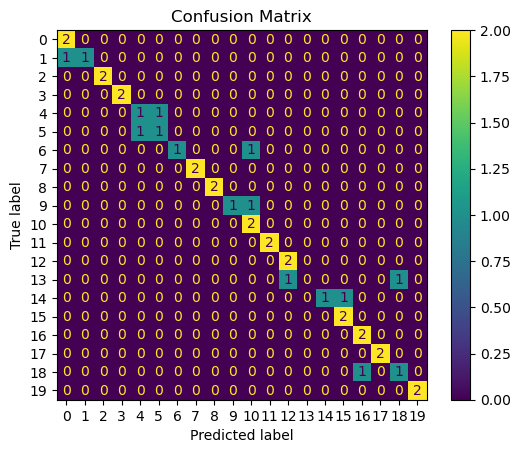

In [62]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [63]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         2
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         2
          16       0.67      1.00      0.80         2
          17       0.67      1.00      0.80         2
          18       1.00    

After trying multiple different parameters and test runs, an accuracy of 80% seems to be the cap

## Artificial Nueral Network Analysis

we will focus on assessing, 'solver', 'activation','alpha','learning_rate','learning_rate_init', and 'max_iter'

In [114]:
Xtrain, Xtest, ytrain, ytest = train_test_split(normX,y, test_size=.2, random_state=42, stratify=y)

In [115]:
ann = MLPClassifier(hidden_layer_sizes=(2000,),
                   activation='logistic',
                   solver='lbfgs',
                   alpha=0.001,
                   batch_size='auto',
                   learning_rate='invscaling',
                   learning_rate_init=0.0001,
                   power_t=0.5,
                   max_iter=400,
                   shuffle=False,
                   random_state=None,
                  )

In [116]:
ann.fit(Xtrain, ytrain)
ann.score(Xtest, ytest)

0.775

In [117]:
y_pred = ann.predict(Xtest)

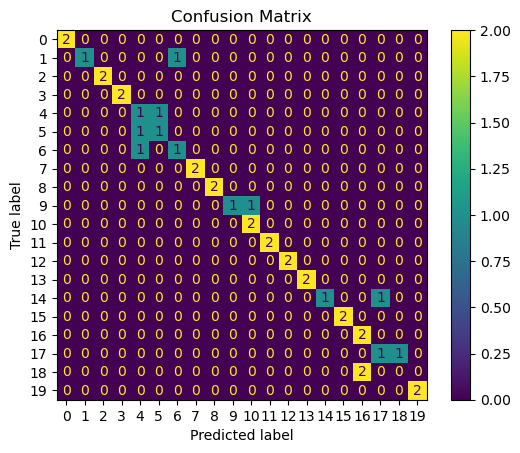

In [118]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [119]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.33      0.50      0.40         2
           6       0.50      0.50      0.50         2
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.50      1.00      0.67         2
          18       0.50    

In [120]:
ann = MLPClassifier(hidden_layer_sizes=(1000,),
                   activation='logistic',  
                   solver='adam', # default
                   alpha=0.0005,
                   batch_size='auto',
                   learning_rate='constant',
                   learning_rate_init=0.005,
                   power_t=0.5,
                   max_iter=500,
                                 )

In [121]:
ann.fit(Xtrain, ytrain)
ann.score(Xtest, ytest)

0.775

In [122]:
y_pred = ann.predict(Xtest)

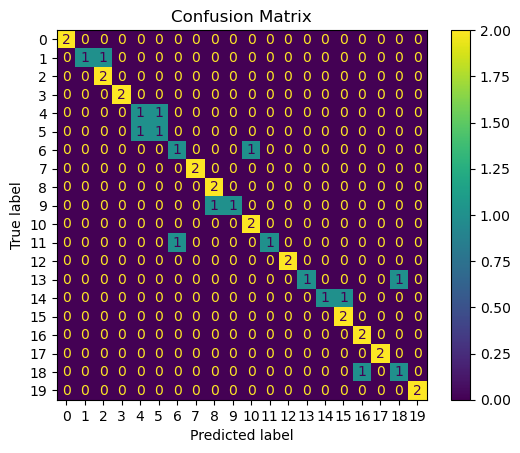

In [123]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [124]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       0.50      0.50      0.50         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      0.50      0.67         2
          11       0.67      1.00      0.80         2
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2
          15       1.00      0.50      0.67         2
          16       0.67      1.00      0.80         2
          17       0.67      1.00      0.80         2
          18       1.00    

In [125]:
ann = MLPClassifier(hidden_layer_sizes=(3000,),
                   activation='relu',
                   solver='sgd',
                   alpha=0.0005,
                   batch_size='auto',
                   learning_rate='invscaling',
                   learning_rate_init=0.75,
                   power_t=0.5,
                   max_iter=600,
                   shuffle=True,
                   random_state=None,
                   tol=0.0001,
                   verbose=False,
                   warm_start=False,
                   momentum=0.9,
                   nesterovs_momentum=True,
                   early_stopping=False,
                   validation_fraction=0.1,
                   beta_1=0.9,
                   beta_2=0.999,
                   epsilon=1e-08,
                   n_iter_no_change=10,
                   max_fun=15000 
                  )

In [126]:
ann.fit(Xtrain, ytrain)
ann.score(Xtest, ytest)

0.7

In [127]:
y_pred = ann.predict(Xtest)

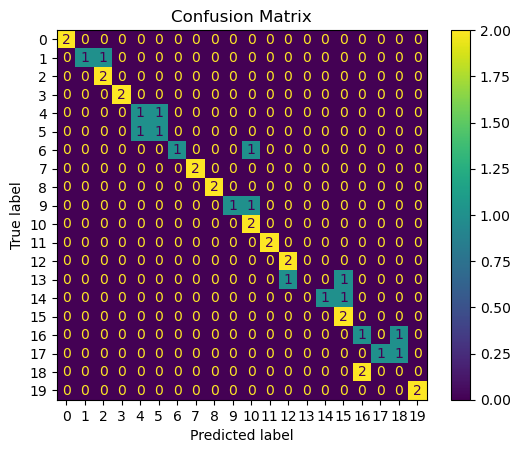

In [128]:
cm = confusion_matrix(ytest, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='viridis') 
plt.title("Confusion Matrix")
plt.show()

In [129]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.50      0.50      0.50         2
           6       0.50      0.50      0.50         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       0.50      1.00      0.67         2
          12       1.00      1.00      1.00         2
          13       0.67      1.00      0.80         2
          14       0.00      0.00      0.00         2
          15       1.00      0.50      0.67         2
          16       0.50      1.00      0.67         2
          17       0.33      0.50      0.40         2
          18       1.00    

The results show that we are able to get to about 80% accuracy on some runs using the different parameters